# <font color=darkred><center>CLAREYAMAR <br>
### <font color=gold><center>Clara Lelis, Yasmin Shimizu, Gabriel Martins<br>
 <font color=darkred><center>*Inluminans Ignotus*☀️🌊
 
<font color=black><center>Divisão responsável pela segurança das águas territoriais e regiões portuárias do reino de Lumi, iluminando a escuridão dos mares e as profundezas do oceano.
    
### <font color=blue><center> Projeto Final: CLAREYAMAR *vs.* Hidra de Lumi
<font color=black><center> Com o primeiro grupo de Auroras saindo das profundezas do oceano, Netuno não ficou nada feliz sabendo que seus filhos tentavam retomar o caminho da luz. Assim, ele mandou uma Hidra - o dragão marinho mais temido e poderoso - para atacar o Reino de Lumi, encontrar e impedir a divisão Clareyamar de desenvoler suas habilidades solares. Ao chegar a Lumi, a fera começou a atacar os habitantes e poluir as águas do reino. Os membros de Clareyamar, percebendo que isso era obra de Netuno, encarregaram-se de encontrar a Hidra, através dos rastros de poluição deixados na água por ela, e derrotá-la, impedindo a destruição de Lumi e provando-se dignos de entrar na Legião da Alvorada - onde almejam, finalmente, encontrar Pheabus. Então, analisando fatores como o pH, a concentração de sólidos, a condutividade e a turbidez, a divisão foi capaz de prever a dureza dos corpos d'água de Lumi, influenciada pelas escamas da Hidra, assim, encontrando-a e derrotando-a.

## <font color=darkred> Introdução

<font color=black>Como trabalho final da matéria de Aprendizado de Máquina do Bacharelado em Ciência e Tecnologia da Ilum, os presentes discentes utilizaram algoritimos de aprendizado de máquina para construir modelos preditivos que prevessem a dureza da água considerando parâmetros como pH, turbidez, total de sólidos dissolvidos, condutividade, entre outros. Para isso, aplicamos 4 modelos diferentes: um Regressor K-NN, um Regressor Linear por Mínimos Quadrados, um Regressor Linear Lasso e uma Árvore de Decisão, além do modelo baseline. Assim, visando analisar o desempenho dos regressores e encontar o que mais se adequa ao *dataset* em questão, foi feita uma análise comparativa das previsões e seu erros em comparação com o *target*.
    
<font color=black>Todos os dados foram obtidos no *dataset* "*Water Quality*" da plataforma *Kaggle*. O arquivo contém métricas de qualidade da água para 3276 corpos d'água diferentes. O dataset tem dados de propriedades da água como pH, dureza, condutividade, turbidez e potabilidade, além de dados acerca dos poluentes presentes na água como os sólidos, as cloroaminas, os sulfatos, os carbonos orgânicos e os trialometanos dissolvidos. O dataset possui 3276 linhas e 10 colunas, porém para a aplicação do trabalho, retiramos as linhas que tinham dados faltantes, restando 2011 linhas para trabalhar.

<font color=black>Antes dos treinos dos modelos, foi feita a separação dos dados em treino e teste e aplicada uma busca em grade para encontrar os melhores hiperparâmetros para os dados de treino. Os modelos foram treinados nos mesmos dados de treino e testados nos dados de teste. Ao longo da aplicação, realizamos medidas de erro dos modelos utilizando como métrica a raiz do erro quadrático médio e plotamos gráficos comparando as previsões com os dados de teste conhecidos para análise da performance dos modelos. Todos os processos foram suportados pela implementação de funções do módulo `scikit-learn`.

## <font color=darkred> Desenvolvimento

Para o presente trabalho, foram utilizadas algumas bibliotecas. As bibliotecas `pandas` e `os` foram utilizadas na manipulação do *dataset*, convertendo-o em um *dataframe*; com o `numpy`, realizamos algumas operações nos dados; e o `matplotlib` foi utilizado na plotagem dos gráficos.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Primeiramente, importamos o dataset escolhido para o `notebook jupyter` e o armazenamos em um *dataframe*, retirando as linhas com dados faltantes. 

<div class="alert alert-warning">
Note que é importante que o arquivo com os dados esteja salvo no mesmo diretório no qual este caderno se encontra. As instruções para baixar o arquivo *dataset* encontra-se na seção "Data Set" do README.
</div>

In [2]:
local=os.getcwd()

df = pd.read_csv(local+'\\water_potability.csv')
df = df.dropna()

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [3]:
magn = [min(df["Hardness"]), max(df["Hardness"])]
print(f"Os dados de dureza estão no intervalo fechado {magn} mg/L.")

Os dados de dureza estão no intervalo fechado [73.4922336890611, 317.33812405558257] mg/L.


A fim de analisar o desempenho dos modelos observados, importamos a função `mean_squared_error` do módulo `scikit learn` e criamos uma função `calcula_RMSE` para utilizar como métrica e melhor visualizar o comportamento das previsões calculadas.

In [4]:
from sklearn.metrics import mean_squared_error

def calcula_RMSE(y_verdadeiro, y_previsto):
    """Recebe um conjunto de dados conhecidos e um conjunto de dados previstos, compara ambos calculando a raíz do erro quadrático médio e retorna o valor de RMSE obtido."""

    RMSE = mean_squared_error(y_verdadeiro, y_previsto, squared=False)

    return RMSE

Além disso, criamos um função `regressao_linear_simples`, que retorna os coeficientes obtidos numa regressão linear com apenas um atributo, a fim de usá-la posteriormente na plotagem de gráficos. A regressão por mínimos quadrados será posteriormente explicada para aplicação do modelo.

In [5]:
def regressao_linear_simples(x, y):
    """Recebe dois conjuntos de dados X e Y e retorna os coeficientes beta_0 e beta_1 da curva y = beta_0 + beta_1*x que melhor ajusta os dados.
    Para isso, utiliza-se o método de quadrados mínimos."""
    media_x = np.mean(x)
    media_y = np.mean(y)

    beta_1 = sum((x - media_x) * (y - media_y)) / sum((x - media_x) ** 2)
    beta_0 = media_y - beta_1 * media_x

    return beta_0, beta_1

### <font color=darkred>Split em treino e teste

A fim de treinar e testar a eficácia dos modelos treinados, foi feita a separação do dataset escolhido em 90% dos dados para treino e 10% para teste. Para isso, utilizamos a função `train_test_split` do `scikit learn`, usando uma semente aleatória para guardar a separação feita.

In [6]:
from sklearn.model_selection import train_test_split

TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 2110024

indices = df.index
indices_treino, indices_teste = train_test_split(
    indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA
)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

In [7]:
df_treino

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
52,6.652488,145.010172,19871.788448,4.961066,288.052192,545.974994,10.942024,71.727414,3.742090,0
1059,7.617149,196.606942,27080.268722,7.382755,345.179887,329.016646,8.547283,60.144702,2.391540,0
3209,4.857803,222.399990,15668.273618,7.900790,320.394529,417.804063,15.530563,84.228774,3.966571,1
2211,4.808040,186.160570,19118.050299,7.054444,359.406236,577.491371,8.304288,73.153089,3.597760,0
1331,6.057068,184.373232,14807.268490,5.753405,384.821967,462.006170,14.753055,34.265860,4.371748,0
...,...,...,...,...,...,...,...,...,...,...
2595,7.682762,211.663852,12723.342101,6.672341,380.945603,360.107441,14.175317,69.949675,5.044306,0
2496,6.057905,149.122794,23603.501870,6.537028,302.698631,393.293478,17.615229,54.217939,4.269753,0
660,7.543931,192.234541,24227.961139,7.241343,336.151050,369.427699,18.188873,70.588507,3.703191,1
1403,7.721033,203.354788,35800.699273,7.683399,312.919044,424.966995,18.092608,96.442129,4.168487,0


In [8]:
df_teste

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
1342,8.248703,201.338857,24912.879705,7.877666,389.088844,415.683448,12.842048,51.859151,3.540532,0
452,7.040245,192.955983,20988.429410,6.422359,320.948844,381.357350,15.396455,88.298465,3.993410,0
192,7.362737,185.692181,16268.448606,5.317019,316.918648,419.258448,16.024246,64.678914,4.408513,0
2504,4.851104,146.627237,20227.643783,6.340534,368.941214,346.520310,15.266726,56.989926,3.644107,0
1177,5.484151,196.791251,19378.359067,5.003731,295.591019,348.399033,18.713876,76.414153,4.438858,1
...,...,...,...,...,...,...,...,...,...,...
2053,3.846454,211.757205,14686.283390,7.557873,326.912134,371.269374,21.765170,35.781529,3.143431,0
2307,9.808258,220.049574,34132.067979,9.752751,233.870327,367.044379,13.498665,62.954260,4.481261,1
2439,7.895769,168.724047,28723.617627,9.341475,353.976181,517.436676,11.992772,79.860552,4.391731,1
212,5.304143,160.968358,25299.511557,6.286043,300.500689,497.790391,15.013030,61.115513,4.165724,0


Após, salvamos essa divisão em *dataframes* contendo apenas os atributos e apenas o *target* em questão (dureza da água).

In [9]:
atr_treino = df_treino[["ph","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]]
target_treino = df_treino["Hardness"]

atr_teste = df_teste[["ph","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]]
target_teste = df_teste["Hardness"]

Tendo finalizado o tramamento dos dados e definido as funções que serão utilizadas ao longo do projeto, partimos para a aplicação dos modelos escolhidos.

### <font color=darkred> Modelo Baseline
    
Primeiramente, a fim de comparar o desempenho dos demais modelos treinados, utilizamos o modelo preditivo baseline - modelo linear em que o coeficiente angular é nulo, de modo que a reta encontrada seja constante. A expressão do modelo *baseline* é dada por:

$$ y = \beta_0 + \epsilon. $$    
    
Assim, utiliza-se apenas os *targets* de treino, calculando a média ou valor esperado destes para encontrar o valor de $\beta_0$. Para isso, aplicamos a função `DummyRegressor` importada do módulo `scikit-learn`.

In [10]:
from sklearn.dummy import DummyRegressor

modelo_bl = DummyRegressor()

modelo_bl.fit(atr_treino,target_treino)

previsoes_bl = modelo_bl.predict(atr_teste)

print("O baseline previsto foi de", previsoes_bl[0], " mg/L.")

RMSE_bl = calcula_RMSE(target_teste, previsoes_bl)

print(f"O RMSE do modelo k-NN foi de {RMSE_bl} mg/L.")

O baseline previsto foi de 195.9331002983793  mg/L.
O RMSE do modelo k-NN foi de 34.53543651088391 mg/L.


Desse modo, o modelo *baseline* previu a dureza da água como a média da dureza das amostras de teste, ou seja, 195,93 mg/L, para todas os diferentes valores de atibutos, com a raíz do resíduo quadrado médio de 34,54 mg/L.

Dada tal previsão, plotamos um gráfico que relaciona os *targets* que o *dataset* apresenta à previsão realizada pelo modelo, com a curva que melhor representa tal relação (calculada por mínimos quadrados, o ajuste mais tradicional e ideal para representações gráficas). A fim de analisar visualmente o desempenho das previsões, plotamos também uma "curva ideal" na qual $x=y$, ou seja, quando todas as previsões coincidiram com os *targets*. É importante ressaltar que a "curva ideal" não é a curva esperada, visto que, se as previsões coincidiram exatamente com os targets, há um *overfiting* e provável erro discrepante de previsões para demais valores não analisados. Desse modo, queremos que a curva que descreve o comportamento dos ponto neste gráfico se aproxime da curva ideal, mas não seja sobreposta a tal.

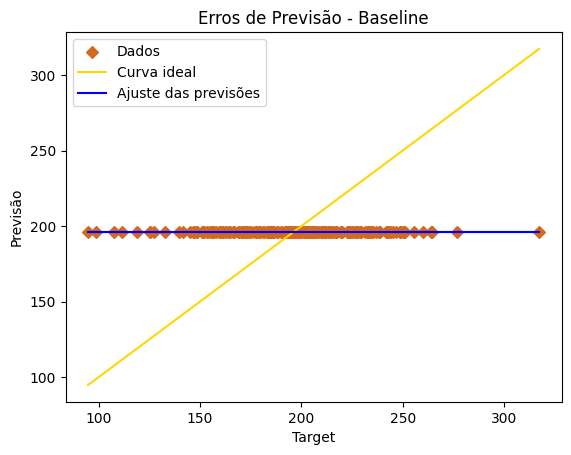

In [11]:
#Grafico Target x Previsões

#plotando dados de teste
plt.scatter (target_teste, previsoes_bl, marker = "D", color = "chocolate", label = "Dados")

#plotando curva ideal
plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

#ajustando dados de teste
b0_bl, b1_bl = regressao_linear_simples(target_teste,previsoes_bl)  
xfit = np.array(target_teste) #conversão em array para melhor manipulação algébrica
yfit_bl = b0_bl + b1_bl*xfit
plt.plot(xfit, yfit_bl, color = "blue", label = "Ajuste das previsões")

plt.title(f"Erros de Previsão - Baseline")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Com a plotagem deste gráfico, podemos visualizar a previsão realizada pelo modelo *baseline*, que, como esperado, segue um comportamento linear constante, com $\beta_0$ igual à média dos *targets* de entrada para treino. Tal gráfico será importante para analisar as previsões feitas pelos demais modelos preditivos utilizados, como abordado a seguir.

### <font color=darkred> Regressor k-NN

<font color=black>Para o regressor K-NN foi utilizada a função `KNeighborsRegressor` da biblioteca `scikit-learn`, essa função recebe alguns hiperparâmetros como o número de vizinhos, o peso que é atribuído a cada vizinho e o tipo de distância utilizada na predição. A função utilizada para busca recebe dois tipos de peso, que são uniforme, ou seja, todos os vizinhos possuem a mesma importância para o valor final, ou por distância, onde o peso do dado é inversamente proporcional à sua distância, e também dois tipos de distância, a manhattan, que se trata da distância absoluta entre os pontos em cada dimensão, e a euclidiana, que é a distância absoluta entre dois pontos. Além disso, o parametro K(quantidade de vizinhos) foi variado entre os valores 3, 5, 7, 10 e 15 apenas para fins de comparação. Para encontrar o melhor conjunto de hiperparâmetros foi utilizado o `GridSearchCV` para fazer a busca em grade da melhor combinação possível dos parâmetros citados anteriormente.

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

NUM_FOLDS = 10

espaco_de_busca_knn = {
    'n_neighbors':[3, 5, 7, 10, 15], 
    'weights': ['uniform', 'distance'],
    'p': [1,2]
}

modelo_knncv = KNeighborsRegressor()

buscador_knn = GridSearchCV(
    modelo_knncv,
    espaco_de_busca_knn,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
    refit=True,  # reajusta o melhor modelo com todos os dados de treino
    n_jobs=-1,
)

buscador_knn.fit(atr_treino, target_treino)

resultados_knn = pd.DataFrame(buscador_knn.cv_results_)

params_knn = buscador_knn.best_params_

print(f"A melhor métrica (considerando dados de treino) foi de {abs(buscador_knn.best_score_)}. mg/L")

print(f"O conjunto de hiperparâmetros que resultou nesta métrica foi {params_knn}.")

resultados_knn.reindex(
    ["mean_test_score", "std_test_score", "params"], axis=1
)

A melhor métrica (considerando dados de treino) foi de 32.96934529746294. mg/L
O conjunto de hiperparâmetros que resultou nesta métrica foi {'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}.


,mean_test_score,std_test_score,params
0,-36.775248,1.710419,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}"
1,-37.113923,1.608299,"{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}"
2,-37.000158,1.709371,"{'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}"
3,-37.409081,1.721450,"{'n_neighbors': 3, 'p': 2, 'weights': 'distance'}"
4,-35.085301,1.532263,"{'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}"
5,-35.355895,1.473559,"{'n_neighbors': 5, 'p': 1, 'weights': 'distance'}"
6,-35.231308,1.749733,"{'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}"
7,-35.598895,1.718643,"{'n_neighbors': 5, 'p': 2, 'weights': 'distance'}"
8,-34.289182,1.316665,"{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}"
9,-34.565567,1.324050,"{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}"


<font color=black> Para encontrar o melhor conjunto de hiperparâmetros foi utilizada raiz do erro quadrático médio (RMSE) sobre o dados de treino, sendo que quanto menor o módulo do erro, melhor o modelo. O modelo utilizado para testes recebeu como hiperparâmetros o conjunto com melhor desempenho e depois foi ajustado aos dados de treino.
    
<font color=black> Em seguida foram realizadas as predições com base nos atributos de teste. As previsões foram comparadas com os targets dos testes e foi feito o cálculo do RMSE destes dados para avaliar a eficiência do modelo. Plotamos também o gráfico de Erros de Previsão, como feito para o modelo *baseline*.

In [13]:
# Criar uma instância do modelo
modelo_knn = KNeighborsRegressor(**params_knn)

# Ajustar o modelo aos dados
modelo_knn.fit(atr_treino, target_treino)

# Realizar uma previsão
previsoes_knn = modelo_knn.predict(atr_teste)

RMSE_knn = calcula_RMSE(target_teste, previsoes_knn)

print(f"O RMSE do modelo k-NN foi de {RMSE_knn} mg/L.")

O RMSE do modelo k-NN foi de 34.65659271681007 mg/L.


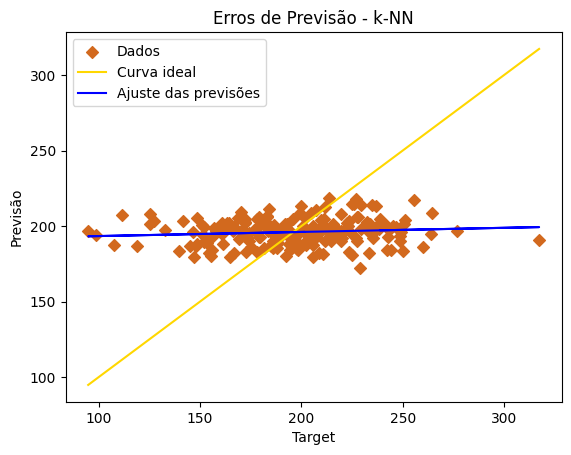

In [14]:
#Grafico Target x Previsões

#plotando dados de teste
plt.scatter (target_teste, previsoes_knn, marker = "D", color = "chocolate", label = "Dados")

#plotando curva ideal
plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

#ajustando dados de teste
b0_knn, b1_knn = regressao_linear_simples(target_teste,previsoes_knn)  
xfit = np.array(target_teste) #conversão em array para melhor manipulação algébrica
yfit_knn = b0_knn + b1_knn*xfit
plt.plot(xfit, yfit_knn, color = "blue", label = "Ajuste das previsões")

plt.title(f"Erros de Previsão - k-NN")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Pela observação do gráfico, percebe-se que as previsões do modelo K-NN foram bastante dispersas se comparadas com as referentes aos outros modelos apresentados a seguir, porém ainda se pode notar uma concentração de valores próximos ao 200. A curva de regressão apresenta leve inclinação em direção à curva ideal, mas com comportamento quase paralelo ao eixo x e muito próximo ao *baseline*. Analisando a disposição de valores, pode-se concluir que o modelo não prevê os targets com precisão sendo pouco eficaz neste caso - o que se relaciona com o RMSE alto, considerando a magnitude do target.

### <font color=darkred> *LinearRegression*
    
Modelos lineares de previsão consistem em métodos de regressão nos quais há uma combinação linear dos atributos para ajustar os dados. Em geral, modelos lineares são expressos por:
 
$$ \hat{y} = \beta_0 + \sum_{i=1}^{p}\beta_ix_i$$
 
em que $\hat{y}$ é previsão do modelo, $x_i$ são os atributos analisados, $\beta_i$ são os coeficientes que acompanham $x_i$ da combinação linear, e $\beta_0$ é o *intercepto* - ou seja, o valor inicial do modelo. Note que $p$ representa o número de atributos.
 
 
A previsão de modelos lineares mais tradicional é o **método de mínimos quadrados**, que define os coeficientes $\beta_i$ buscando minimizar a soma dos resíduos quadrados. Tal método é dado pela expressão:
$$
{\mathrm{min}} \sum_{j=1}^{n}\big(y_j-(\underset{\hat{y}_{j}}{\underbrace{\beta_0 + \sum_{i=1}^{p}\beta_ix_{ji}}})\big)^2
$$
em que $y_j$ representa cada *target* e $\hat{y}_{j}$ representa a previsão dada com base nos atributos $x_{ji}$. Note que $n$ é o número de dados obtidos e $p$ é o número de atributos.
 
Neste trabalho, implementamos o modelo `LinearRegression()` do `scikit-learn`. Novamente, foi feita uma busca em grade para otimização de hiperparâmetros - neste caso, variamos a presença ou ausência de interceptos, realizar ou não uma cópia dos atributos para evitar alterações, e a presença ou ausência de coeficiente positivos.

In [15]:
from sklearn.linear_model import LinearRegression

NUM_FOLDS = 10

espaco_de_busca_lr = {
    'fit_intercept':[True,False], 
    'copy_X':[True, False],
    'positive':[True, False]
}

modelo_lcv = LinearRegression()

buscador_lr = GridSearchCV(
    modelo_lcv,
    espaco_de_busca_lr,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
    refit=True,  # reajusta o melhor modelo com todos os dados de treino
    n_jobs=-1,
)

buscador_lr.fit(atr_treino, target_treino)

resultados_lr = pd.DataFrame(buscador_lr.cv_results_)

params_lr = buscador_lr.best_params_

print(f"A melhor métrica (considerando dados de treino) foi de {abs(buscador_lr.best_score_)} mg/L.")

print(f"O conjunto de hiperparâmetros que resultou nesta métrica foi {params_lr}.")

resultados_lr.reindex(
    ["mean_test_score", "std_test_score", "params"], axis=1
)

A melhor métrica (considerando dados de treino) foi de 31.99556858017521 mg/L.
O conjunto de hiperparâmetros que resultou nesta métrica foi {'copy_X': True, 'fit_intercept': True, 'positive': False}.


,mean_test_score,std_test_score,params
0,-32.212708,1.666405,"{'copy_X': True, 'fit_intercept': True, 'posit..."
1,-31.995569,1.623530,"{'copy_X': True, 'fit_intercept': True, 'posit..."
2,-35.369710,1.914964,"{'copy_X': True, 'fit_intercept': False, 'posi..."
3,-35.369710,1.914964,"{'copy_X': True, 'fit_intercept': False, 'posi..."
4,-32.212708,1.666405,"{'copy_X': False, 'fit_intercept': True, 'posi..."
5,-31.995569,1.623530,"{'copy_X': False, 'fit_intercept': True, 'posi..."
6,-35.369710,1.914964,"{'copy_X': False, 'fit_intercept': False, 'pos..."
7,-35.369710,1.914964,"{'copy_X': False, 'fit_intercept': False, 'pos..."


É interessante analisar que as métricas foram as mesma quando apenas o parâmetro `copy_X` foi alterado, além de que quando `fit_intercept = False` a métrica também é sempre a mesma, indicando que, além de ter pouca variação nos hiperparâmetros do modelo `LinearRegression`, estes pouco afetam o desempenho de tal. Isso se dá pois os hiperparâmetros não são excludentes entre si - por exemplo, mesmo se `positive = False`, podem haver apenas coeficientes positivos na regressão encontrada.

Com o modelo e seus hiperparâmetros definidos, fizemos a aplicação nos dados de teste e calculamos o RMSE e plotamos o gráfico de erros de previsão.

In [16]:
modelo_lr = LinearRegression(**params_lr)

modelo_lr.fit(atr_treino,target_treino)

previsoes_lr = modelo_lr.predict(atr_teste)

RMSE_lr = calcula_RMSE(target_teste, previsoes_lr)

print(f"O RMSE do modelo linear por mínimos quadrados foi de {RMSE_lr} mg/L.")

O RMSE do modelo linear por mínimos quadrados foi de 34.18018169718684 mg/L.


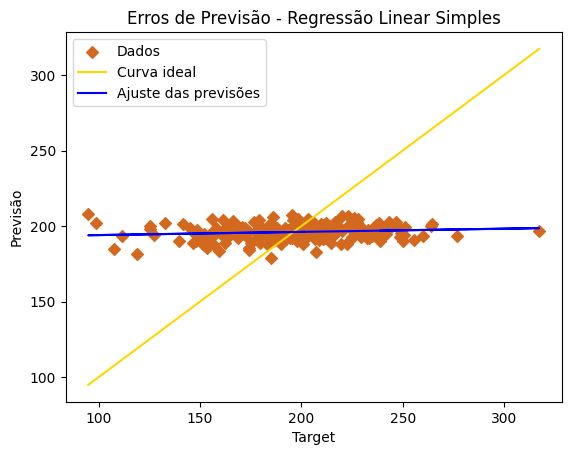

In [17]:
#Grafico Target x Previsões

#plotando dados de teste
plt.scatter (target_teste, previsoes_lr, marker = "D", color = "chocolate", label = "Dados")

#plotando curva ideal
plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

#ajustando dados de teste
b0_l, b1_l = regressao_linear_simples(target_teste,previsoes_lr)  
xfit = np.array(target_teste) #conversão em array para melhor manipulação algébrica
yfit_l = b0_l + b1_l*xfit
plt.plot(xfit, yfit_l, color = "blue", label = "Ajuste das previsões")

plt.title("Erros de Previsão - Regressão Linear Simples")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Pela observação do gráfico, percebe-se que, assim como nos outros modelos, as previsões ficaram concentradas num pequeno intervalo próximo a 200, sendo mais levemente mais concentradas ao ajuste das previsões que os modelos previamente apresentados. A curva de ajuste apresenta um crescimento leve, similar aos demais. Analisando a disposição de valores, pode-se concluir que o modelo também não prevê os targets com precisão, sendo pouco eficaz neste caso - o que se relaciona com o RMSE alto, considerando a magnitude do target.

### <font color=darkred>LassoCV
    
Partindo da regresão linear por mínimos quadrados, é possível aplicar uma penalização nos termos $\beta_ix_{ji}$, a fim de minimizar ainda mais o erro quadrado. Tal modelo com penalização é chamado de **Lasso**, que visa eliminar alguns termos do modelo linear zerando coeficientes $\beta_i$ para apresentar um modelo que se adeque melhor aos dados evitando o *overfiting*. Essa eliminação de coeficientes é dada ao somar o produto entre um *índice de penalização* $\alpha$ e cada coeficiente $\beta$.Assim, a expressão do Lasso é dada por:

$$
{\mathrm{min}} \frac{1}{2n} \sum_{j=1}^{n}\big(y_j-(\underset{\hat{y}_{j}}{\underbrace{\beta_0 + \sum_{i=1}^{p}\beta_ix_{ji}}})\big)^2 + \alpha\sum_{i=1}^{p}\mid\beta_i\mid
$$

em que buscamos os valores dos coeficientes $\beta$ que minimizam a função, sendo $\alpha$ o chamado *índice de penalização*. Note que $n$ é o número de dados obtidos e $p$ é o número de atributos. A razão $\frac{1}{2n}$ que multiplica o primeiro termo na expressão trata-se de um normalizador relacionado ao número de dados, cuja finalidade é simplificar o cálculo da derivada utilizado para a minimização da função.
 
É importante observar que, se $\alpha=0$, o ajuste obtido pelo Lasso é o mesmo obtido pelo método de mínimos quadrados, visto que não há penalização sobre os coeficientes. Já se $\alpha \rightarrow \infty$, a penalização é infinita e todos os coeficientes são zerados, de modo que o modelo linear obtido seja inconclusivo e igual a zero. Desse modo, é preciso encontrar um valor $0<\alpha<\infty$ que torne o modelo mais eficiente, utilizando uma métrica como, por exemplo, o RMSE, para testar os modelos treinados. Para isso, é possível utilizar a estratégia de *validação cuzada* para dividir os dados analisados, testando diferentes valores de $\alpha$ em cada *fold* e analisando o melhor desempenho dos modelos treinados através de uma métrica.
    
Neste trablalho, implementamos o `LassoCV()` do `scikit-learn`, que otimiza o parâmetro $\alpha$ po si só e aplicamos aquele que apresentou o melhor desempenho no modelo `Lasso()`.

In [18]:
from sklearn.linear_model import LassoCV

#implementação do modelo
modelo_lassocv = LassoCV(cv=10)

#fitando o modelo
modelo_lassocv.fit(atr_treino, target_treino)

#guandando o melhor alpha encontrado
melhor_alpha = modelo_lassocv.alpha_
list_alphas = modelo_lassocv.alphas_

print(f"Os valores de alpha testado foram: {list_alphas}.")
print(f"Dentre os valores testados, o que apresentou melhor desempenho foi {melhor_alpha}.")

Os valores de alpha testado foram: [16708.59651297 15582.49302972 14532.2851523  13552.85777089
 12639.44051697 11787.58452886 10993.14078328 10252.23988725
  9561.2732319   8916.87541653  8315.9078572   7755.44349999
  7232.75256466  6745.28924898  6290.67932929  5866.70859667
  5471.31207244  5102.5639506   4758.66821802  4437.94990683
  4138.84693641  3859.90250513  3599.75799493  3357.14635404
  3130.88592575  2919.87469307  2723.08491124  2539.55810207
  2368.40038559  2208.77812636  2059.91387317  1921.08257241
  1791.60803667  1670.8596513   1558.24930297  1453.22851523
  1355.28577709  1263.9440517   1178.75845289  1099.31407833
  1025.22398872   956.12732319   891.68754165   831.59078572
   775.54435      723.27525647   674.5289249    629.06793293
   586.67085967   547.13120724   510.25639506   475.8668218
   443.79499068   413.88469364   385.99025051   359.97579949
   335.7146354    313.08859258   291.98746931   272.30849112
   253.95581021   236.84003856   220.87781264   205

Com o modelo e melhor valor de $\alpha$ definidos, fizemos a aplicação nos dados de teste e calculamos o RMSE.

In [19]:
# aplicação do lasso com o melhor alpha encontrado

from sklearn.linear_model import Lasso

modelo_lasso = Lasso(alpha=melhor_alpha)

modelo_lasso.fit(atr_treino,target_treino)

previsoes_lasso = modelo_lasso.predict(atr_teste) #previsões feitas pelo modelo

RMSE_lasso = calcula_RMSE(target_teste, previsoes_lasso)

print(f"O RMSE do modelo linear Lasso foi de {RMSE_lasso} mg/L.")

O RMSE do modelo linear Lasso foi de 34.518167477446795 mg/L.


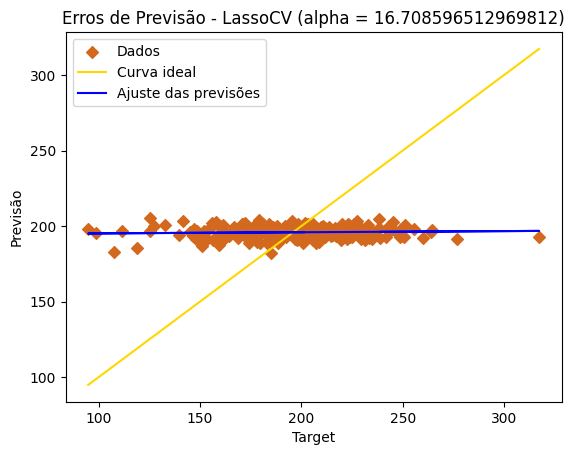

In [20]:
#Grafico Target x Previsões

#plotando dados de teste
plt.scatter (target_teste, previsoes_lasso, marker = "D", color = "chocolate", label = "Dados")

#plotando curva ideal
plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

#ajustando dados de teste
b0_lasso, b1_lasso = regressao_linear_simples(target_teste,previsoes_lasso)  
xfit = np.array(target_teste) #conversão em array para melhor manipulação algébrica
yfit_lasso = b0_lasso + b1_lasso*xfit
plt.plot(xfit, yfit_lasso, color = "blue", label = "Ajuste das previsões")

plt.title(f"Erros de Previsão - LassoCV (alpha = {melhor_alpha})")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Pela observação do gráfico, percebe-se que, assim como nos outros modelos, as previsões ficaram concentradas próximo ao *baseline*, sendo mais concentradas ao ajuste das previsões que os modelos previamente apresentados. A curva de ajuste apresenta um crescimento leve, similar aos anteriores. Analisando a disposição de valores, pode-se concluir que o modelo também não prevê os targets com precisão, sendo pouco eficaz neste caso - o que se relaciona com o RMSE alto, considerando a magnitude do target. Em comparação com o modelo linear simples, utilizado como base para este modelo, o comportamento mais uniforme dos dados pode estar relacionada com a penalização de coeficientes, forncecendo dados mais ajustados - ainda que com maior métrica de erro, que pode, por sua vez, estar relacionada a diferenças visualmente inperceptíceis na inclinação ou intercepto da reta de ajuste, por exemplo.

### <font color=darkred>Árvore de decisão

Por fim, o último modelo explorado foi a Árvore de Decisão, que apresenta um grafo direcional acíclico na qual seus vértices apresentam condições que representam alguma característica dos dados analisados. Inicialmente, o grafo começa pelo vértice raiz, a qual duas setas saem e nenhuma chega, caso o critério seja cumprido, segue-se no grafo pela seta da esquerda, se não, segue-se pela seta da direita. Após o vértice raiz, temos vértices de decisão, na qual uma seta chega e duas saem, elas seguem a mesma lógica de critério do vértice raiz. Ao longo desse trajeto, a porcentagem de dados que seguem aquelas condições acumuladas tende a diminuir até o suficiente para a previsão probabilística. Esse vértice final é chamado de vértice folha, na qual uma seta chega e nenhuma sai, e apresenta um valor de previsão final.

Inicialmente, fizemos uma busca em grade para obter os melhores hiperparâmetros do modelo - neste caso, variamos a profundidade máxima, o número mínimo de amostras para divisão de um nó, e o número mínimo de amostras por folha.

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

NUM_FOLDS = 10

espaco_de_busca_ad = {
    "max_depth": [None, 2, 3, 5, 7, 10],
    "min_samples_split": [2, 3, 4],
    "min_samples_leaf": [2, 3, 4],
}

modelo_acv = DecisionTreeRegressor()

buscador_ad = GridSearchCV(
    modelo_acv,
    espaco_de_busca_ad,
    cv=NUM_FOLDS,
    scoring="neg_root_mean_squared_error",
    refit=True,  # reajusta o melhor modelo com todos os dados de treino
    n_jobs=-1,
)

buscador_ad.fit(atr_treino, target_treino)

resultados_ad = pd.DataFrame(buscador_ad.cv_results_)

params_ad = buscador_ad.best_params_

print(f"A melhor métrica (considerando dados de treino) foi de {abs(buscador_ad.best_score_)} mg/L.")

print(f"O conjunto de hiperparâmetros que resultou nesta métrica foi {params_ad}.")

resultados_ad.reindex(
    ["mean_test_score", "std_test_score", "params"], axis=1
)

A melhor métrica (considerando dados de treino) foi de 32.07239892976823 mg/L.
O conjunto de hiperparâmetros que resultou nesta métrica foi {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}.


,mean_test_score,std_test_score,params
0,-43.261672,2.583171,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
1,-43.072238,2.722621,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
2,-43.197554,2.775262,"{'max_depth': None, 'min_samples_leaf': 2, 'mi..."
3,-42.375125,2.057656,"{'max_depth': None, 'min_samples_leaf': 3, 'mi..."
4,-42.460965,2.076059,"{'max_depth': None, 'min_samples_leaf': 3, 'mi..."
5,-42.433652,2.233561,"{'max_depth': None, 'min_samples_leaf': 3, 'mi..."
6,-40.425664,2.457236,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
7,-40.425826,2.389007,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
8,-40.429981,2.456697,"{'max_depth': None, 'min_samples_leaf': 4, 'mi..."
9,-32.072399,1.802389,"{'max_depth': 2, 'min_samples_leaf': 2, 'min_s..."


Com o modelo e seus hiperparâmetros definidos, fizemos a aplicação e plotamos a árvore de decisão.

O RMSE do modelo árvore de decisão foi de 33.88676755178129 mg/L.


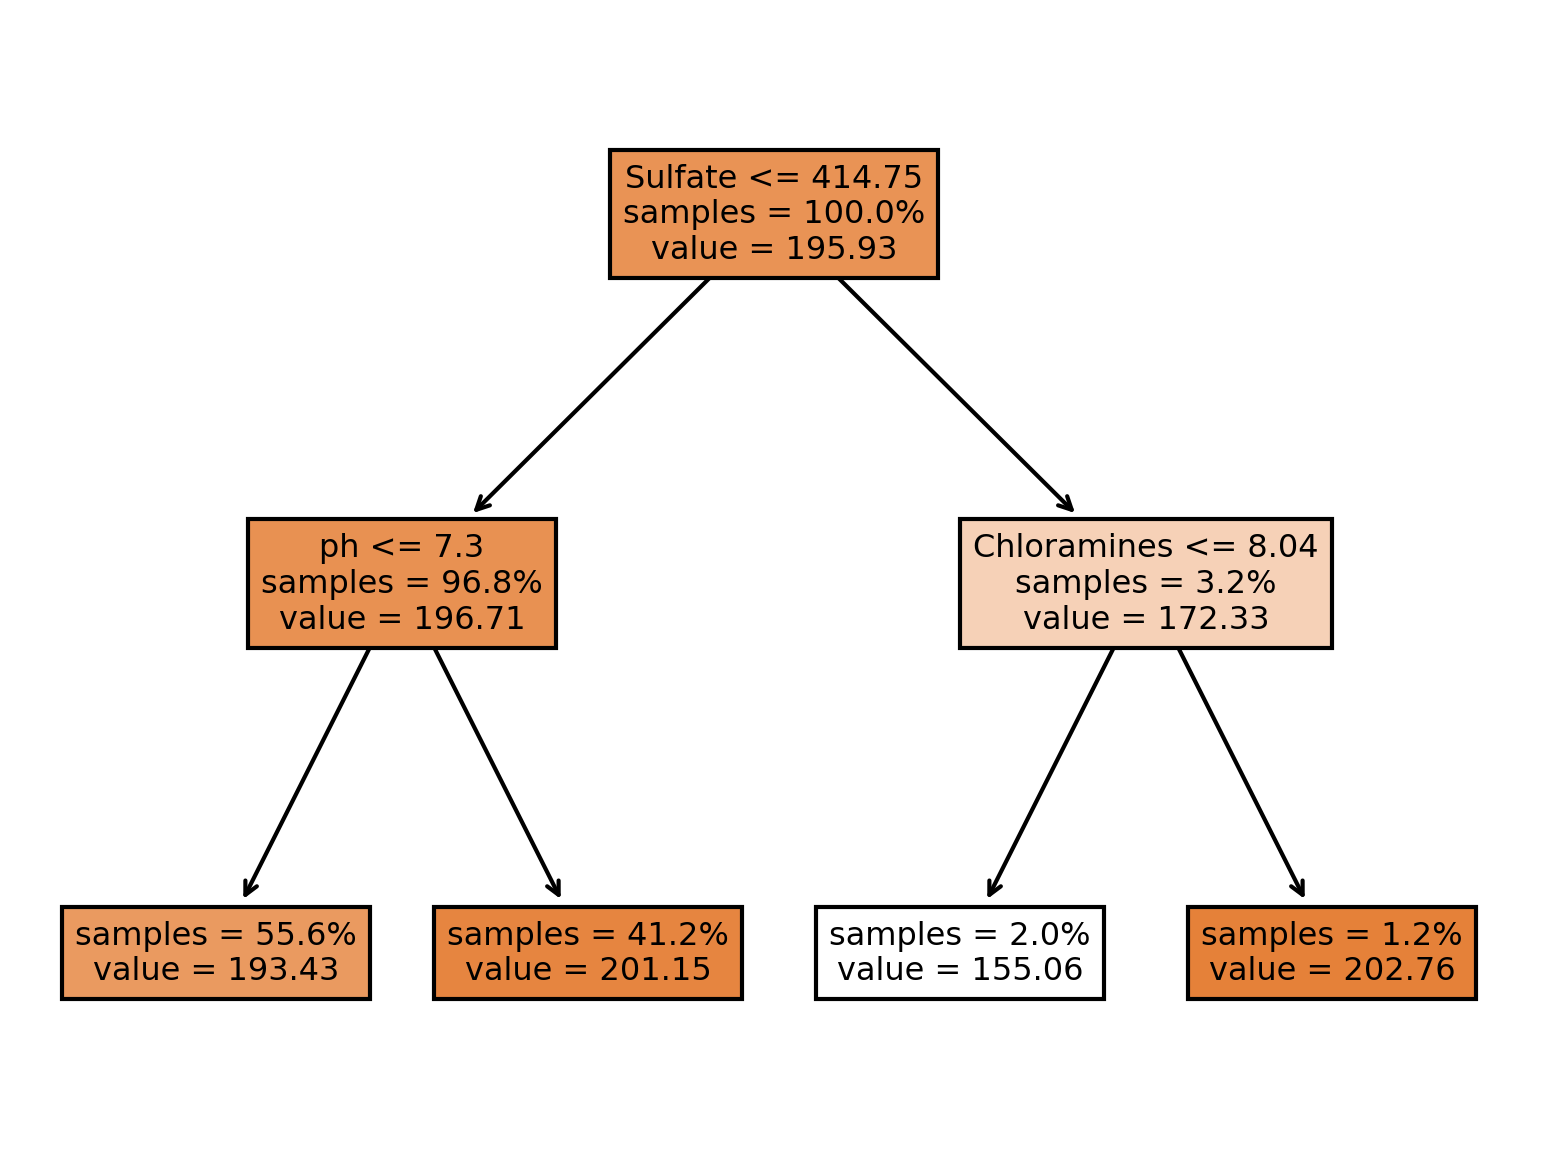

In [22]:
modelo_a = DecisionTreeRegressor(**params_ad)
modelo_a.fit(atr_treino, target_treino)

figura, eixo = plt.subplots(dpi=300)

tree.plot_tree(
    modelo_a,
    feature_names=atr_treino.columns.tolist(),
    ax=eixo,
    impurity=False,
    filled=True,
    proportion=True,
    precision=2,
);

previsoes_a = modelo_a.predict(atr_teste)

RMSE_a = calcula_RMSE(target_teste, previsoes_a)

print(f"O RMSE do modelo árvore de decisão foi de {RMSE_a} mg/L.")

Com a árvore plotada, é possível viajar pelos nós e seguir os critérios até chegar a um vértice folha. 

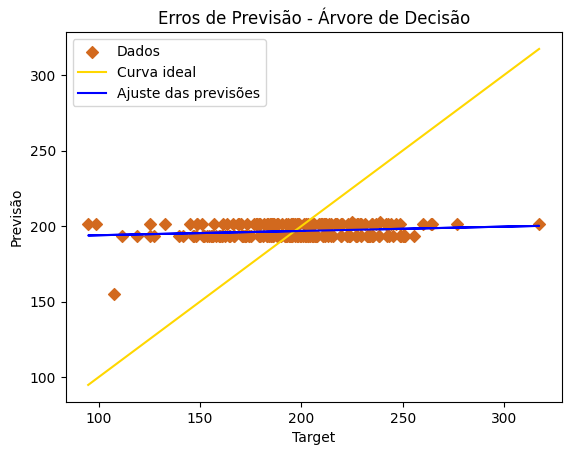

In [23]:
#Grafico Target x Previsões

#plotando dados de teste
plt.scatter (target_teste, previsoes_a, marker = "D", color = "chocolate", label = "Dados")

#plotando curva ideal
plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

#ajustando dados de teste
b0_a, b1_a = regressao_linear_simples(target_teste,previsoes_a)  
xfit = np.array(target_teste) #conversão em array para melhor manipulação algébrica
yfit_a = b0_a + b1_a*xfit
plt.plot(xfit, yfit_a, color = "blue", label = "Ajuste das previsões")

plt.title(f"Erros de Previsão - Árvore de Decisão")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Plotando e observando o gráfico de erros de previsão, percebe-se que, assim como nos outros modelos, as previsões ficaram concentradas próximas ao *baseline*, e levemente mais concentradas no ponto comum entre a reta ideal e o ajuste das previsões. A curva de ajuste apresenta um crescimento leve, além de que as previsões da árvore de decisão são as menos dispersas e muito mais lineares entre os quatro modelos. Além disso, vemos um único ponto que foge completamente do comportamento dos demais, estando muito abaixo da reta ajustada. Tal comportamento é esperado, considerando que o hiperparâmetro utilizado para o treinamento do modelo considerou profundidade igual a dois nós e apenas quatro folhas, havendo grande coincidência dos 200 valores previstos.

## <font color=darkred>Comparação das métricas calculadas
    
A fim de comparar o desempenho dos modelos treinados para prever a dureza da água dos dados de teste, plotamos um gráfico de barras que relaciona o RMSE obtido à seu respectivo modelo.

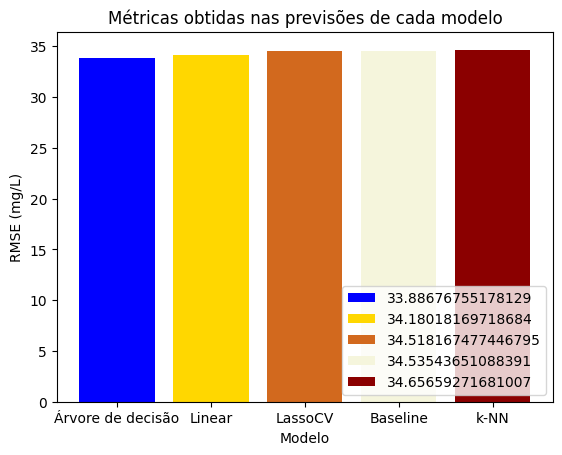

In [24]:
plt.bar("Árvore de decisão", RMSE_a, color="b", label=RMSE_a)
plt.bar("Linear", RMSE_lr, color="gold", label= RMSE_lr)
plt.bar("LassoCV", RMSE_lasso, color = "chocolate", label = RMSE_lasso)
plt.bar("Baseline", RMSE_bl, color = "beige", label = RMSE_bl)
plt.bar("k-NN", RMSE_knn, color = "darkred", label = RMSE_knn)

plt.title("Métricas obtidas nas previsões de cada modelo")
plt.legend(loc='lower right')
plt.xlabel("Modelo")
plt.ylabel("RMSE (mg/L)")
plt.show()

Aqui, percebe-se que a diferença entre os desempenhos dos modelos foram mínimas. Devido a isso, plotamos tais valores novamente reduzindo o intervalo exibido para o eixo y para visualizar melhor a diferença entre as métricas.

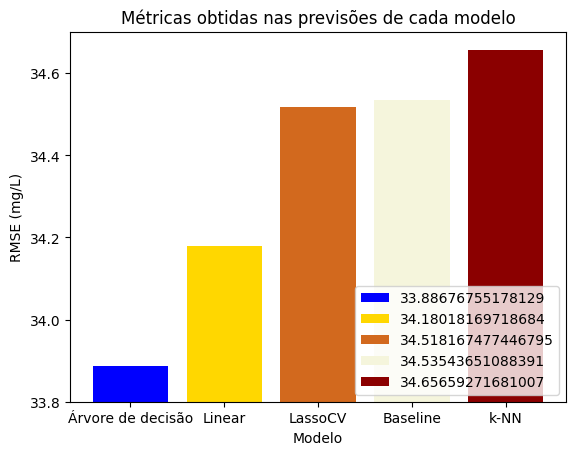

In [25]:
plt.bar("Árvore de decisão", RMSE_a, color="b", label=RMSE_a)
plt.bar("Linear", RMSE_lr, color="gold", label= RMSE_lr)
plt.bar("LassoCV", RMSE_lasso, color = "chocolate", label = RMSE_lasso)
plt.bar("Baseline", RMSE_bl, color = "beige", label = RMSE_bl)
plt.bar("k-NN", RMSE_knn, color = "darkred", label = RMSE_knn)

plt.ylim(33.8,34.7)

plt.title("Métricas obtidas nas previsões de cada modelo")
plt.legend(loc='lower right')
plt.xlabel("Modelo")
plt.ylabel("RMSE (mg/L)")
plt.show()

O primeiro fator que chama atenção nos desempenhos obtidos é como o RMSE calculado para todos os modelos é próximo do valor obtido pelo *baseline*, conhecido por ser um preditor ruim ao igualar todos os *targets* à sua média. Mais que isso, é surpreendente que um dos modelos - o k-NN - apresenta um modelo ainda pior que o modelo de base. Podemos, então, observar a correlação entre as colunas do dataset utilizado. Desse modo, percebe-se que os dados tem um correlação extremamente baixa para todas as suas colunas, de modo que não seja possível relacionar precisamente os atributos e *targets* para previsão. Isso pode, ainda, explicar porque a métrica do k-NN foi pior que a do *baseline*, visto que a primeira é geralmente utilizada para dados com alta correlação. 

In [26]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


A ordem esperada dos valores de RMSE referentes aos modelos testados variam dependendo dos dados utilizados para treiná-los. O modelo k-NN pode apresentar erros maiores caso os dados não possuam uma relação linear tão notável, portanto se perde um pouco ao calcular as distâncias no espaço dos atributos. Pelo mesmo motivo das relações não-lineares dos dados, os modelos lineares também não apresentaram RMSE tão satisfatórios; além disso, esperava-se que o Lasso apresentasse um desempenho mais ajustado os dados em comparação com o regressor linear simples, o que não aconteceu, podendo indicar que alguns atributos podem estar intrinsecamente relacionados (como, por exemplo, dos sólidos dissolvidos na água e seu pH), de modo que zerar atributos não se mostre ideal nesse caso. O modelo de Árvore de Decisão tende a se sair bem com relações não-lineares, porém, a natureza dos dados parece dificultar o processo de treino, gerando um RMSE menor em relação aos outros, mas ainda não suficientemente bom. Ainda sim, houve pouca variação do RMSE entre os modelos, indicando uma diferença mínima no desempenho destes, de modo que seria necessária a análise aprofundada da métrica de todos os folds da busca em grade ou teste de outros hiperparâmetros, ou o treinamento de um modelo com menos atributos , por exemplo, ou ainda aplicação de outro modelo.

## <font color=darkred> Conclusão

Ao final do projeto, obtivemos com sucesso os 4 modelos almejados inicialmente, realizamos as métricas para avaliar o desempenho destes, e conseguimos valores não muito satisfatórios, todos próximos a 34 mg/L, considerando a magnitude dos dados, que estão em um intervalo entre cerca de 73 e 317 mg/L, e muito similares ao baseline, sendo que o modelo k-NN se mostrou ainda pior que o modelo de comparação,. Além disso, pelos resultados dos gráficos, há bastante divergência entre os valores previstos e os valores de teste conhecidos. Isso se deu, provavelmente, devido à natureza dos dados, com sua baixa correlação,  ou a quantidade de atributos usados para treinar, o que pode ter complexado demais o processo de treino. Supomos que, utilizando menos atributos, poderíamos testar novamente com os 4 modelos e selecionar o que apresentar a melhor performance.

### <font color=darkred> Referências

CASSAR, DR. ATP-203 1.1 - Tratamento de dados. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 2.1 - Aprendizado de máquina, k-NN e métricas. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 3.0 - Modelo linear e baseline. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 4.0 - Split de dados de treino e teste. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 4.1 - Árvore de decisão. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 5.0 - Validação cruzada, busca aleatória e busca em grade. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 6.0 - Desempacotando listas e dicionários com operadores estrela. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

Water Quality. Disponível em: <https://www.kaggle.com/datasets/adityakadiwal/water-potability>. Acesso em: 7 de Set. 2024.

SCIKIT LEARN. sklearn.model_selection.GridSearchCV — scikit-learn 0.22 Documentation. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html>. Acesso em: 13 de Out. 2024.

SCIKIT LEARN. sklearn.neighbors.KNeighborsRegressor — scikit-learn 0.22 Documentation. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.kneighbors>. Acesso em: 13 de Out. 2024.

SCIKIT LEARN. Linear models — scikit-learn 0.22 Documentation. Disponível em: <https://scikit-learn.org/stable/modules/linear_model.html>. Acesso em: 23 set. 2024.

SCIKIT LEARN. LinearRegression — scikit-learn 0.22 Documentation. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>. Acesso em: 13 de Out. 2024.

SCIKIT LEARN. LassoCV — scikit-learn 0.22 Documentation. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html>. Acesso em: 13 de Out. 2024.

KEVIN, A. Lasso: uma introdução. Disponível em: <https://www.ime.usp.br/~kevinx/LASSO_Texto.pdf>. Acesso em: 23 set. 2024.

KIREN, M. Lasso regression: a comprehensive guide. Disponível em: <https://kirenz.github.io/regression/docs/lasso.html>. Acesso em: 23 set. 2024.

SCIKIT LEARN. DecisionTreeRegressor — scikit-learn 0.22 Documentation. Disponível em: <https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html>. Acesso em: 13 de Out. 2024.